In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model

> **Import of the CSV file**

In [3]:
store=pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')

In [4]:
store.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


**Finding out the number of empty cells in the dataset**

In [6]:
store.drop(store.columns[[0]], axis = 1, inplace = True)

In [7]:
store.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [8]:
store.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

**Descriptive Statistics of the Dataset**

There exists no empty cells in the dataset


In [9]:
store.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


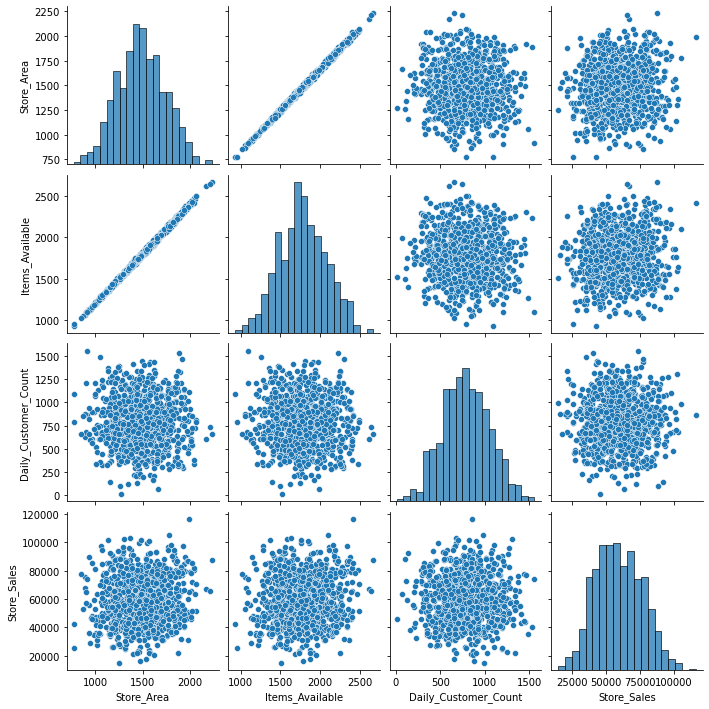

In [10]:
sns.pairplot(store,palette='Paired')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

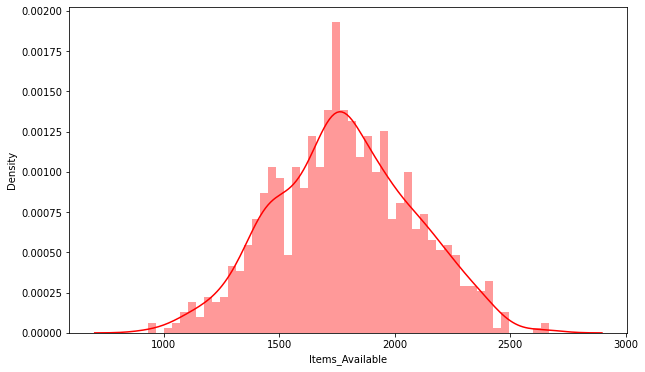

In [11]:
ax=plt.figure(figsize=(10,6))
sns.distplot(store["Items_Available"],color="red",bins=50)

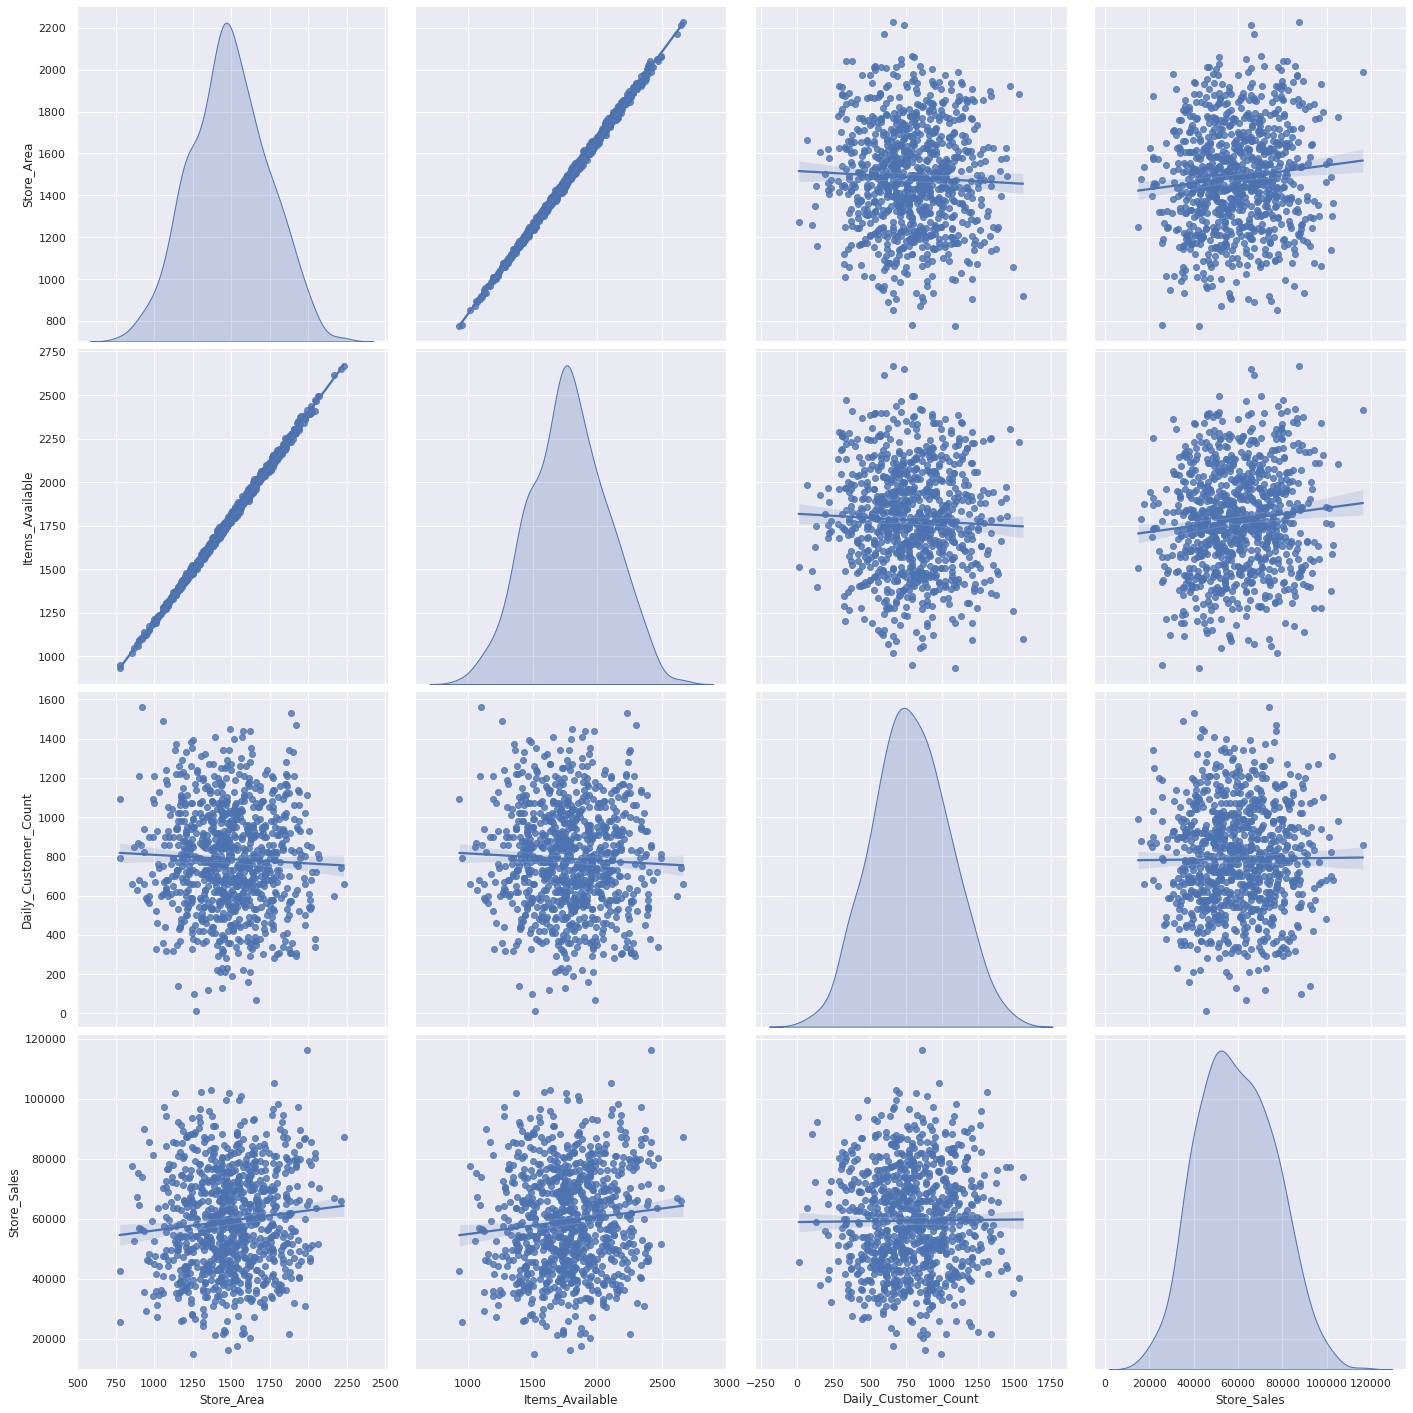

In [12]:
sns.set()
sns.pairplot(store,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

In [13]:
correlation = store.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Area', ylabel='Density'>

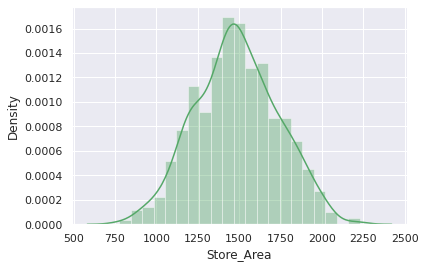

In [14]:
sns.distplot(store.Store_Area,color='g')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

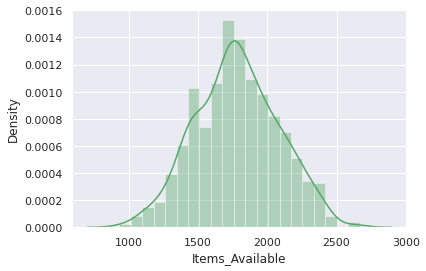

In [15]:
sns.distplot(store.Items_Available,color='g')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

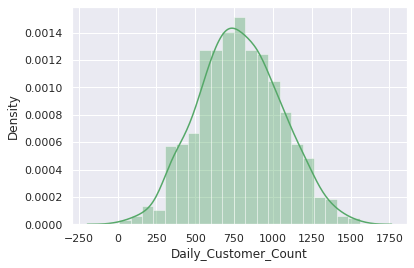

In [16]:
sns.distplot(store.Daily_Customer_Count,color='g')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Sales', ylabel='Density'>

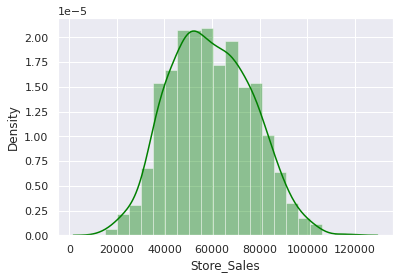

In [17]:
sns.distplot(store.Store_Sales,color='green')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


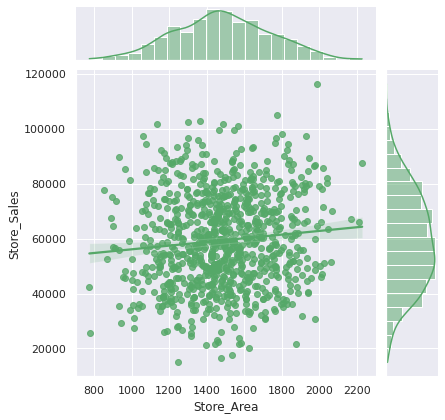

In [18]:
sns.jointplot('Store_Area','Store_Sales',store,kind='reg',color='g')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
store.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [21]:
x_train,x_test,y_train,y_test=train_test_split(store[['Store_Area','Items_Available','Daily_Customer_Count']],store['Store_Sales'],test_size=0.3)

In [22]:
len(x_train)

627

In [23]:
len(x_test)

269

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
lr.predict(x_test)

array([36280, 77250, 65890, 78090, 62180, 50130, 50130, 51560, 53230,
       69610, 65890, 76530, 50130, 53230, 63020, 72000, 62180, 65890,
       36280, 51480, 62180, 53230, 69610, 64780, 50130, 80410, 69940,
       50130, 53230, 36280, 58610, 62180, 70940, 76530, 50130, 62180,
       40350, 59820, 69610, 50130, 36280, 50130, 60440, 69610, 76530,
       54820, 50810, 59820, 50130, 65890, 36280, 70940, 36280, 46100,
       62180, 36280, 58610, 36280, 70940, 65890, 63020, 40350, 72350,
       60440, 69940, 82020, 76530, 76530, 35420, 69610, 76530, 51480,
       50130, 62180, 52780, 50130, 69940, 69610, 62180, 69610, 36280,
       65890, 53230, 76530, 36280, 78090, 54370, 76530, 50130, 62180,
       51480, 65890, 50130, 62180, 63020, 50130, 58610, 53230, 53230,
       47060, 76530, 53230, 36280, 58610, 62180, 58610, 61210, 76530,
       69610, 45480, 69940, 62180, 62180, 65890, 60440, 61210, 36280,
       80410, 50130, 52780, 65890, 54610, 50130, 69940, 50130, 71570,
       43860, 76530,

In [28]:
x_test

,Store_Area,Items_Available,Daily_Customer_Count
404,1948,2374,930
10,1187,1439,1090
123,1947,2333,790
313,1659,2008,620
843,1463,1751,900
...,...,...,...
598,1664,2016,830
832,1330,1606,590
31,1250,1508,990
536,1192,1445,810


In [29]:
lr.score(x_test,y_test)

0.0

In [30]:
lr.coef_

array([[-0.00722882,  0.02718155, -0.03732294],
       [-0.01352873, -0.01209966,  0.05712706],
       [ 0.00207957, -0.0151791 ,  0.0395782 ],
       ...,
       [ 0.01273183, -0.0103073 ,  0.01303741],
       [-0.00809186,  0.00031895,  0.02611761],
       [-0.00507833,  0.02419836, -0.03359979]])

In [31]:
lr.intercept_

array([-4.36643576e-06, -3.53910819e-04, -9.55303654e-05, -1.11057562e-04,
        7.02213360e-06, -1.53115521e-05, -2.49872997e-05, -6.56104735e-05,
        1.29786583e-04,  1.95226371e-04,  3.68715427e-04,  6.19196405e-05,
        1.30670189e-04,  2.02751650e-04,  7.85326315e-05, -1.18190591e-04,
       -2.69888313e-04,  1.62813906e-05,  2.49185064e-04, -5.56605988e-05,
        2.13324594e-04, -1.99185146e-04,  1.49909426e-04, -9.14095952e-05,
        9.48143436e-05,  2.05692473e-04, -5.40721245e-05, -1.02504264e-04,
        2.71840713e-04,  2.63870338e-05,  3.13803715e-05,  2.52856856e-04,
       -1.89046348e-04,  9.32351446e-05,  2.87529380e-04, -4.66563169e-05,
        2.31615449e-04,  1.66649272e-04, -1.66085345e-05,  2.76782864e-04,
        3.66036469e-04,  1.49115089e-04,  7.34398354e-07,  3.63934644e-04,
        1.11724361e-04,  1.10422636e-04, -2.02335350e-04,  3.16090715e-04,
       -2.18728809e-04, -2.12054984e-04, -1.97693007e-04,  5.42597182e-05,
       -9.99602598e-05,  

In [32]:
from scipy.stats.stats import pearsonr

In [33]:
pearsonr(lr.predict(x_test),y_test)

(0.032149057937399556, 0.5996082011821012)